## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,f1_score, roc_auc_score,precision_score, confusion_matrix, classification_report,recall_score

## Exploratory data analysis

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data
print(df.shape)
print("List of columns in the dataset",df.columns)
print("Null values in the data: ",df.isnull().any().any())
df.describe()

(284807, 31)
List of columns in the dataset Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Null values in the data:  False


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# To check any missing value is present
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

**Highlights**
- There are 30 features with 284807 values in each
- No null values in any columns
- We cannot analyze on columns V1,V2.. V28 but can analyse on Time, Amount and Class
- Since time is only a indicative column which talks about time taken from first transaction, we can remove it.

Here we will observe the distribution of our classes

In [6]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(classes)
print(normal_share,fraud_share)

0    284315
1       492
Name: Class, dtype: int64
99.82725143693798 0.1727485630620034


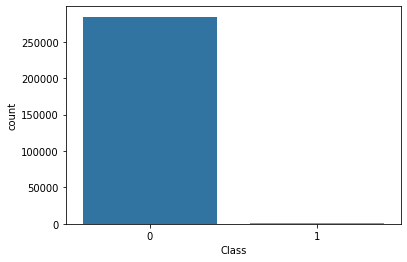

In [7]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
sns.countplot(df['Class'])

- **We can see that the dataset is highly imbalanced, with 99.9% belonging to Class 0 and rest class 1.**

C:\Users\Karthik\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


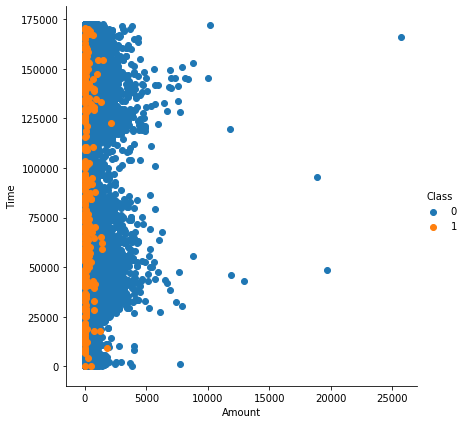

In [8]:
# Create a scatter plot to observe the distribution of classes with time
sns.FacetGrid(df, hue="Class", size = 6).map(plt.scatter, "Amount", "Time").add_legend()

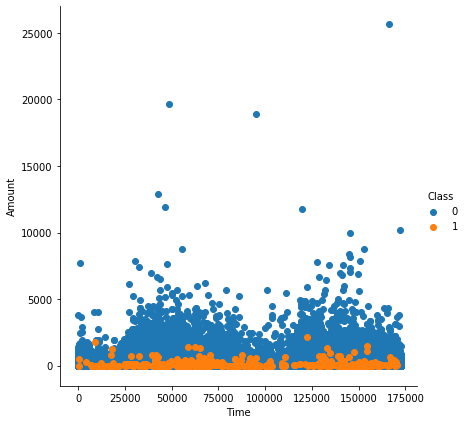

In [9]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.FacetGrid(df, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()

In [10]:
df[['Time','Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


- By looking at the data in 75% and max value above, we can see that Amount column is highly positively skewed.

In [11]:
df = df.drop('Time',axis=1)
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

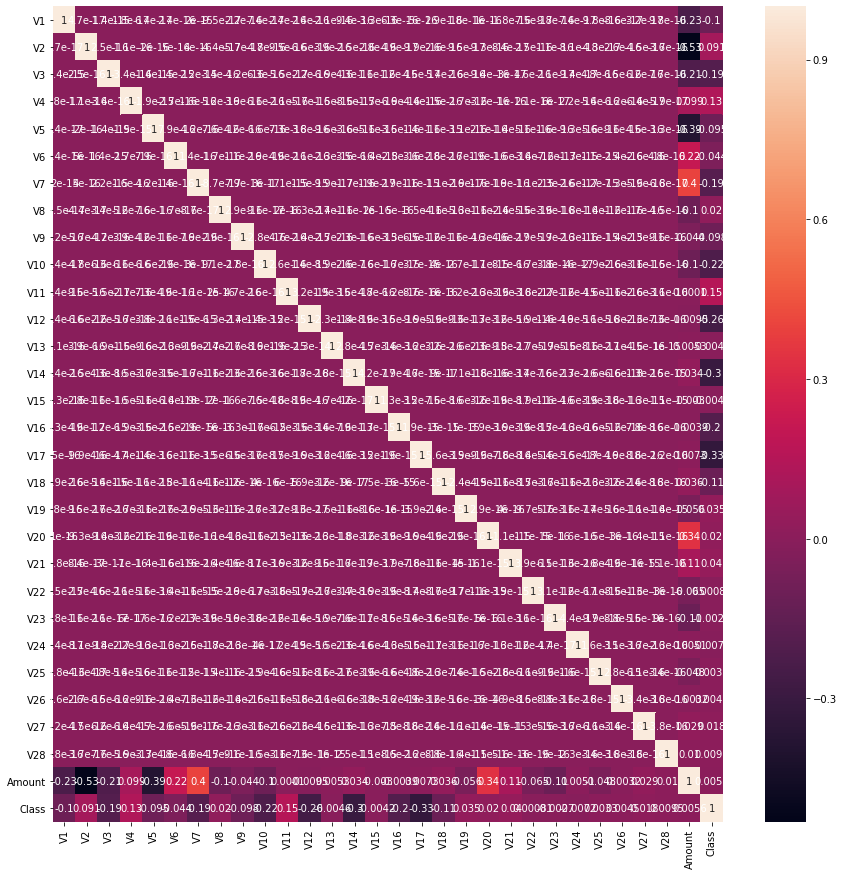

In [12]:
# To get idea about how much all the features are correlated with each other we create heatmap.
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), color='b', annot=True)

In [13]:
## Checking skewness in all columns
df.skew()

V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

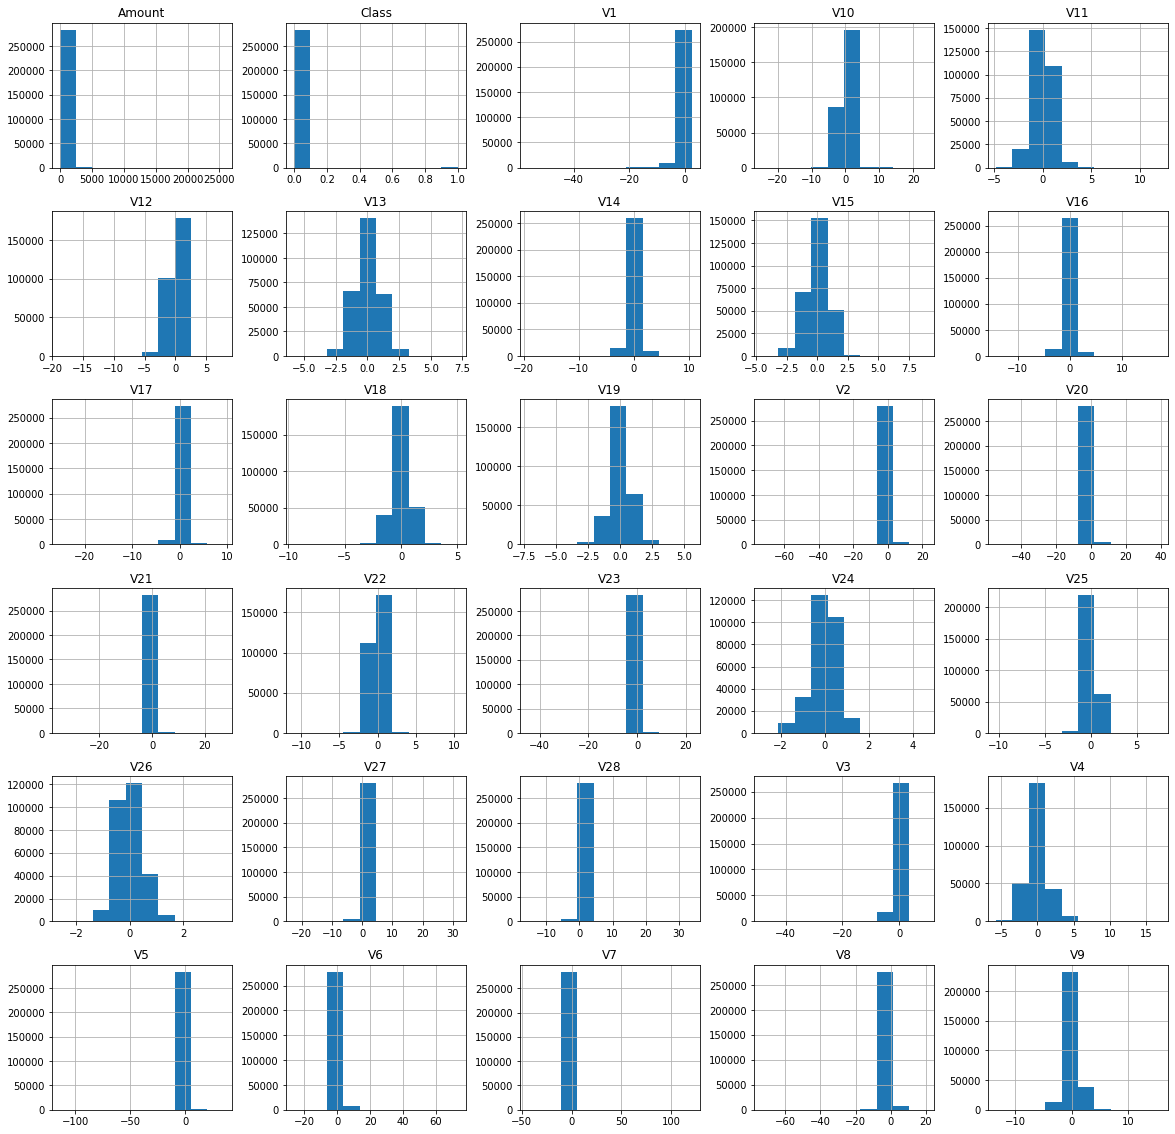

In [14]:
# plot the histogram of a variable from the dataset to see the skewness

df.hist(figsize=(20,20))
plt.show()

- **We can see the skewness in these columns ['V1','V2','V3','V5','V7','V8','V12','V17','V21','V23','V28','Amount']**

In [15]:
## Perform Power transformation to remove the skewness in columns

from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(copy=False)
skewed_col = ['V1','V2','V3','V5','V7','V8','V12','V17','V21','V23','V28','Amount']
## apply power transformation to reduce the skewness in column
df[skewed_col] = pt.fit_transform(df[skewed_col])
df.skew()

V1        -0.218003
V2         0.334852
V3        -0.079980
V4         0.676292
V5        -1.170100
V6         1.826581
V7         2.594575
V8         2.297590
V9         0.554680
V10        1.187141
V11        0.356506
V12        0.158932
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -0.791141
V18       -0.259880
V19        0.109192
V20       -2.037155
V21       -1.966863
V22       -0.213258
V23       -0.249209
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28        1.069193
Amount     0.018354
Class     23.997579
dtype: float64

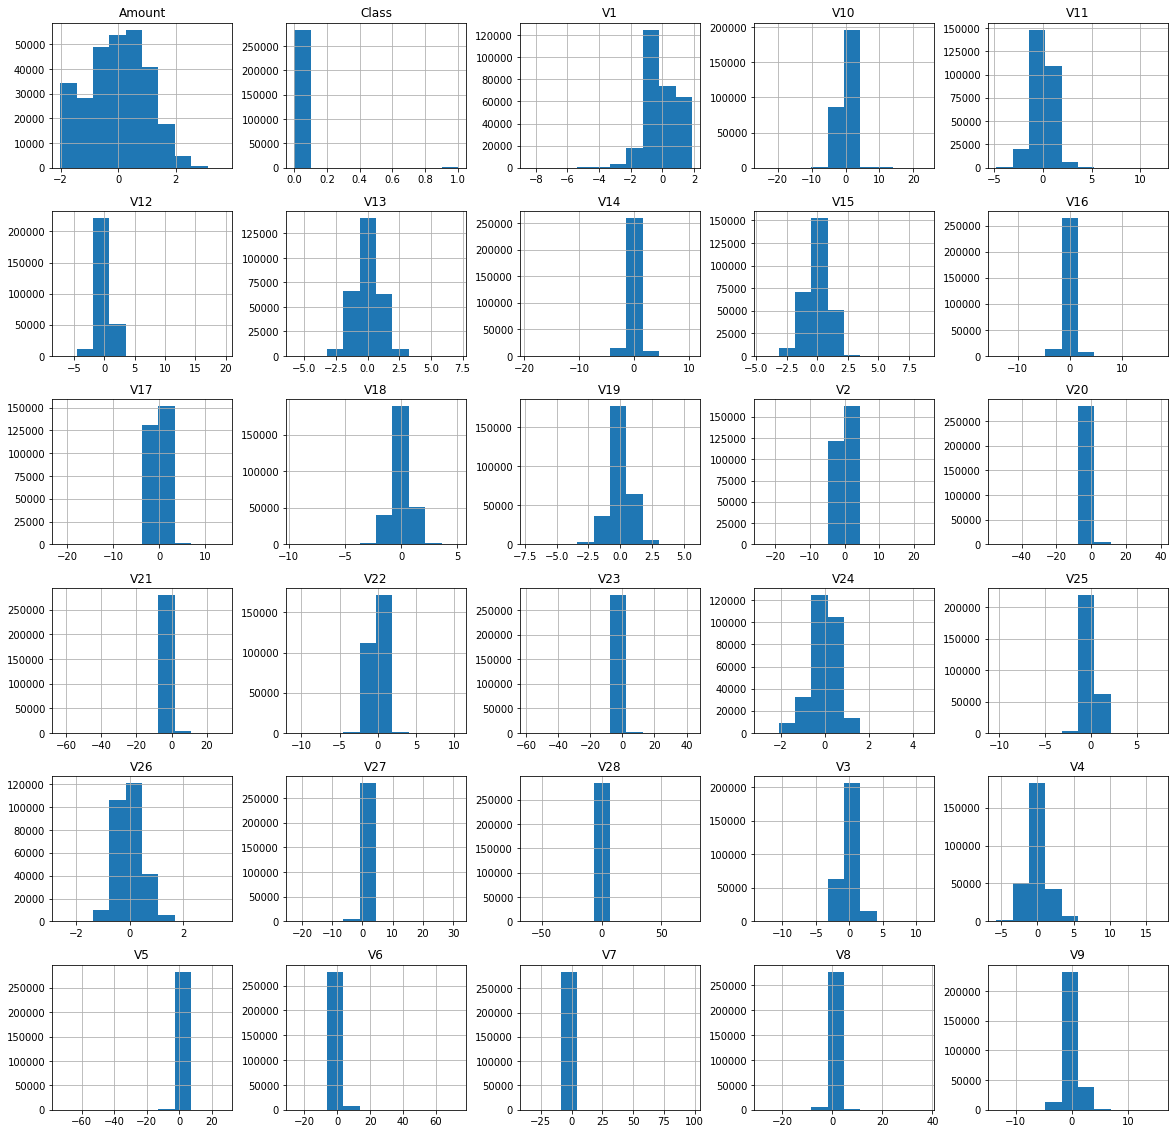

In [16]:
# plot the histogram of a variable from the dataset to see the skewness post transformation

df.hist(figsize=(20,20))
plt.show()

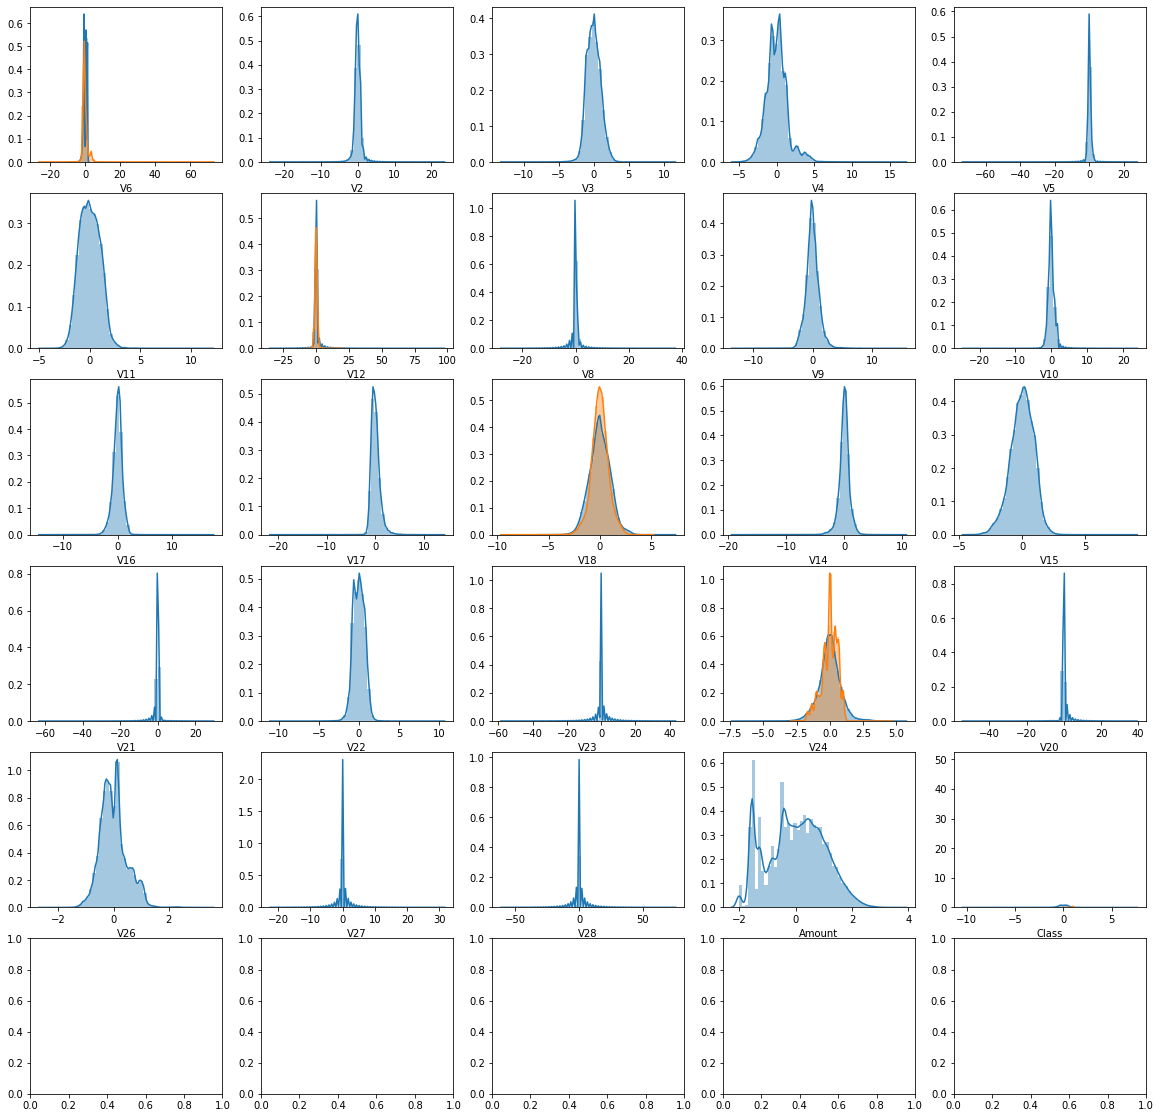

In [17]:

fig, axes = plt.subplots(nrows=6, ncols=5,figsize=(20,20))
for i, column in enumerate(df.columns):
    sns.distplot(df[column],ax=axes[i//6,i%5 ])

- We can see that all the columns are now close to Gaussian distribution

#### Splitting the data into train & test data

In [18]:
# divide data into train and test
X = df.drop("Class", axis = 1)
y= df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4, stratify = y)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [19]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


## Model Building
**We will build four different classifier models and identify which classifier will be more effective in detecting Fraud transcation**
- Models
    - Logistic Regression
    - Decision Tree
    - Random Forest
    - XGBoosting
- Class Imbalance techniques
    - Random OverSampling
    - SMOTE
    - ADASYN
- Metrics to check 
    - Accuracy Score
    - Confusion Matrix
    - Precision Score
    - Recall Score
    - ROC_AUC
    - F1 Score <br>
    
**Since other than ROC_AUC score, rest of the metrics depends on default Threshold value. so for evaulating the model, we should prefer ROC_AUC score.**

In [20]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
32587,0.562704,-0.014496,0.221131,1.329811,-0.210126,0.001885,-0.087834,0.101827,0.174499,0.076974,...,-0.263992,-0.054888,0.011923,-0.062645,0.216326,0.573206,-0.338769,0.030683,0.026411,-1.165167
66824,0.556255,-0.565350,-0.202809,-0.549846,-0.730319,-1.104068,0.001576,-0.283768,-1.331157,0.822710,...,-0.272310,-0.851699,-1.707393,0.217412,0.495465,-0.038479,0.665269,-0.115654,0.064794,1.073622
190646,-2.501991,-1.501182,-1.191349,0.953308,1.687016,-0.440777,1.724376,-3.589699,2.597996,3.960915,...,-5.194299,1.092296,0.533808,2.979555,-0.334919,0.284873,-0.777862,-2.430088,4.416528,0.540138
24534,0.373380,-0.404827,0.277361,-0.651170,-0.892359,-0.528140,-0.782318,-0.018361,-0.091169,0.929836,...,-0.042454,0.629286,1.206595,0.227511,-0.127267,-0.946685,-0.148488,-0.110726,-0.426388,-0.028421
226448,-0.765687,-0.429325,-0.353658,-1.029449,0.052635,-0.156261,0.697708,-0.183171,-1.143577,0.772399,...,-0.050682,0.126153,0.935274,0.207392,0.729578,-0.295664,-0.095489,0.606621,1.345285,1.336839


In [21]:
roc_list=[]

### Logistic Regression

In [22]:
# Logistic Regression
lr=LogisticRegression()
lr.fit(X_train,y_train)

# AUC for Logistic Regression
y_test_prob=lr.predict_proba(X_test)[:,1]
y_pred_cls = lr.predict(X_test)
print("AUC of LogisticRegression before hyperparameter tuning :    \t", round(roc_auc_score(y_test, y_test_prob),2))

AUC of LogisticRegression before hyperparameter tuning :    	 0.97


In [23]:
##### Model Evaluation metrics 
print('Metric for Logistic Regression before hyperparameter tuning')
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_cls)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_cls)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_cls)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_cls)))
print('AUC Score for test: ' + str(roc_auc_score(y_test, y_test_prob)))

Metric for Logistic Regression before hyperparameter tuning
Accuracy Score : 0.9992743700478681
Precision Score : 0.8359375
Recall Score : 0.722972972972973
F1 Score : 0.7753623188405797
AUC Score for test: 0.9718746385755003


In [24]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred_cls)
cnf_matrix

array([[85274,    21],
       [   41,   107]], dtype=int64)

In [25]:
roc_list.append(('LR_plain',round(roc_auc_score(y_test, y_test_prob),3)))
roc_list

[('LR_plain', 0.972)]

In [26]:
## Hyperparameter tuning 

#perform cross validation
folds = StratifiedKFold(n_splits =3, shuffle = True)
params = {'C':[0.01,0.1,1,10],'penalty':['l1','l2']}

#perform hyperparameter tuning
model = GridSearchCV(estimator =lr ,cv=folds,param_grid = params,n_jobs=-1,scoring='roc_auc',verbose=1)
model.fit(X_train,y_train)

#print the evaluation result by choosing a evaluation metric
y_test_pred=model.predict_proba(X_test)[:,-1]
y_pred_cls = model.predict(X_test)
print("AUC for LogisticRegression post hyperparamater tuning: ",round(roc_auc_score(y_test,y_test_pred),2))

# print best hyperparameters
print("Best hyperparameters for LogisticRegression: ", model.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    8.4s finished


AUC for LogisticRegression post hyperparamater tuning:  0.98
Best hyperparameters for LogisticRegression:  {'C': 0.01, 'penalty': 'l2'}


In [27]:
##### Model Evaluation metrics 
print('Metric for Logistic Regression post hyperparameter tuning')
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_cls)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_cls)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_cls)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_cls)))
print('AUC Score for test: ' + str(roc_auc_score(y_test, y_test_pred)))

Metric for Logistic Regression post hyperparameter tuning
Accuracy Score : 0.9993094811745842
Precision Score : 0.8617886178861789
Recall Score : 0.7162162162162162
F1 Score : 0.7822878228782287
AUC Score for test: 0.976906063693097


In [28]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred_cls)
cnf_matrix

array([[85278,    17],
       [   42,   106]], dtype=int64)

In [31]:
roc_list.append(('LR_hyperparameter',round(roc_auc_score(y_test, y_test_pred),3)))
roc_list

[('LR_plain', 0.972), ('LR_hyperparameter', 0.977)]

#### Decition Tree

In [32]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

# AUC for Decision Tree
y_test_pred=dtree.predict_proba(X_test)
y_pred_cls = dtree.predict(X_test) 
print("AUC of DecisionTree before hyperparameter tuning :    \t", round(roc_auc_score(y_test, y_test_pred[:,1]),3))

AUC of DecisionTree before hyperparameter tuning :    	 0.875


In [34]:
##### Model Evaluation metrics 
print('Metric for Decision Tree before hyperparameter tuning')
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_cls)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_cls)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_cls)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_cls)))
print('AUC Score for test: ' + str(roc_auc_score(y_test, y_test_pred[:,1])))

Metric for Decision Tree before hyperparameter tuning
Accuracy Score : 0.999133925541004
Precision Score : 0.75
Recall Score : 0.75
F1 Score : 0.75
AUC Score for test: 0.87478310569201


In [35]:
roc_list.append(('DT_plain',round(roc_auc_score(y_test, y_test_pred[:,1]),2)))
roc_list

[('LR_plain', 0.972), ('LR_hyperparameter', 0.977), ('DT_plain', 0.87)]

In [36]:
### Hyper parameter tuning
# define Cross validataion
cv=StratifiedKFold(n_splits=3,shuffle=True)

# hyperparameter tuning
params ={'criterion':['gini','entropy'],'max_depth':range(1,15,2),'min_samples_leaf': range(20, 100, 20)}

# perform gridsearch 
dtree_gridsearch = GridSearchCV(estimator=dtree,param_grid=params,verbose=1,cv=cv,n_jobs = -1,scoring='roc_auc')
dtree_gridsearch.fit(X_train,y_train)
print(dtree_gridsearch.best_params_)

Fitting 3 folds for each of 56 candidates, totalling 168 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:  4.4min finished


{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 80}


In [37]:
# printing the optimal accuracy score and hyperparameters
y_pred_dt = dtree_gridsearch.predict_proba(X_test)
y_pred_cls = dtree_gridsearch.predict(X_test)
print("AUC of DecisionTree after hyperparameter tuning :    \t", round(roc_auc_score(y_test, y_pred_dt[:,1]),2))
print("Best hyperparameters for Decision Tree: ",dtree_gridsearch.best_params_)

AUC of DecisionTree after hyperparameter tuning :    	 0.96
Best hyperparameters for Decision Tree:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 80}


In [38]:
##### Model Evaluation metrics 
print('Metric for Decision Tree post hyperparameter tuning')
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_cls)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_cls)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_cls)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_cls)))
print('AUC Score for test: ' + str(roc_auc_score(y_test, y_pred_dt[:,1])))

Metric for Decision Tree post hyperparameter tuning
Accuracy Score : 0.9991222218320986
Precision Score : 0.7517241379310344
Recall Score : 0.7364864864864865
F1 Score : 0.7440273037542663
AUC Score for test: 0.9576841423168874


In [39]:
roc_list.append(('DT_hyper',round(roc_auc_score(y_test,y_pred_dt[:,1]),3)))
roc_list

[('LR_plain', 0.972),
 ('LR_hyperparameter', 0.977),
 ('DT_plain', 0.87),
 ('DT_hyper', 0.958)]

#### Random forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(warm_start=True)
rf.fit(X_train,y_train) 

# AUC for Random Forest 
y_test_pred=rf.predict_proba(X_test)
y_pred_cls = rf.predict(X_test)
print("AUC of Random forest before hyperparameter tuning :    \t", round(roc_auc_score(y_test, y_test_pred[:,1]),2))

AUC of Random forest before hyperparameter tuning :    	 0.93


In [41]:
##### Model Evaluation metrics 
print('Metric for Random Forest before hyperparameter tuning')
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_cls)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_cls)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_cls)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_cls)))
print('AUC Score for test: ' + str(roc_auc_score(y_test, y_test_pred[:,1])))

Metric for Random Forest before hyperparameter tuning
Accuracy Score : 0.9995435553526912
Precision Score : 0.936
Recall Score : 0.7905405405405406
F1 Score : 0.8571428571428571
AUC Score for test: 0.9339795669401741


In [42]:
roc_list.append(('RF_plain',round(roc_auc_score(y_test, y_test_pred[:,1]),2)))
roc_list

[('LR_plain', 0.972),
 ('LR_hyperparameter', 0.977),
 ('DT_plain', 0.87),
 ('DT_hyper', 0.958),
 ('RF_plain', 0.93)]

In [52]:
### Hyper parameter tuning
# for max_depth

cv=StratifiedKFold(n_splits=3,shuffle=True)

# hyperparameter tuning for criterion and max_depth
params ={'criterion':['gini','entropy'],'max_depth':range(5,10,2)
        }

# perform gridsearch 
rf_gridsearch = GridSearchCV(estimator=rf,param_grid=params,verbose=1,cv=cv,n_jobs = -1,scoring='roc_auc')
rf_gridsearch.fit(X_train,y_train)
print(rf_gridsearch.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  7.0min finished


{'criterion': 'entropy', 'max_depth': 9}


In [53]:
# hyperparameter tuning for min_samples_split
params ={'criterion':['entropy'],'max_depth':[9],
         'min_samples_split':range(100, 500, 100),'max_features':range(5,10)
        }

# perform gridsearch  
rf_gridsearch_splits = GridSearchCV(estimator=rf,param_grid=params,verbose=1,cv=cv,n_jobs = -1,scoring='roc_auc')
rf_gridsearch_splits.fit(X_train,y_train)
print(rf_gridsearch_splits.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 38.0min finished


{'criterion': 'entropy', 'max_depth': 9, 'max_features': 9, 'min_samples_split': 300}


In [54]:
# hyperparameter tuning for max_features
params ={'criterion':['entropy'],'max_depth':[9],
         'min_samples_split':[300],
         'max_features':[9], 
         'n_estimators': range(50,100,10)
        }

# perform gridsearch  
rf_gridsearch_fe_es = GridSearchCV(estimator=rf,param_grid=params,verbose=1,cv=cv,n_jobs = -1,scoring='roc_auc')
rf_gridsearch_fe_es.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  8.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(warm_start=True), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [9],
                         'max_features': [9], 'min_samples_split': [300],
                         'n_estimators': range(50, 100, 10)},
             scoring='roc_auc', verbose=1)

In [55]:
print("Best parameters are: ",rf_gridsearch_fe_es.best_params_)

Best parameters are:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 9, 'min_samples_split': 300, 'n_estimators': 90}


In [56]:
y_test_pred = rf_gridsearch_fe_es.predict_proba(X_test)
y_pred_cls = rf_gridsearch_fe_es.predict(X_test)
print("AUC of RandonForest after hyperparameter tuning :    \t", round(roc_auc_score(y_test, y_test_pred[:, 1]),2))
roc_list.append(('RF_hyper',round(roc_auc_score(y_test, y_test_pred[:,1]),3)))
print(roc_list)

AUC of RandonForest after hyperparameter tuning :    	 0.98
[('LR_plain', 0.972), ('LR_hyperparameter', 0.977), ('DT_plain', 0.87), ('DT_hyper', 0.958), ('RF_plain', 0.93), ('xgb_plain', 0.97), ('xgb_hyper', 0.971), ('RF_hyper', 0.975)]


In [57]:
##### Model Evaluation metrics for RF
print('Metric for Random Forest post hyperparameter tuning')
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_cls)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_cls)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_cls)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_cls)))
print('AUC Score for test: ' + str(roc_auc_score(y_test, y_test_pred[:,1])))

Metric for Random Forest post hyperparameter tuning
Accuracy Score : 0.9993445923013002
Precision Score : 0.8382352941176471
Recall Score : 0.7702702702702703
F1 Score : 0.8028169014084507
AUC Score for test: 0.975178157523254


#### XGBoosting

In [43]:
from xgboost import XGBClassifier

In [45]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

y_pred_xgb = xgb.predict_proba(X_test)
y_pred_cls = xgb.predict(X_test)

In [46]:
print('Metric for XGBoosting before hyperparameter tuning')
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_cls)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_cls)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_cls)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_cls)))
print('AUC Score for test: ' + str(roc_auc_score(y_test, y_pred_xgb[:,1])))

Metric for XGBoosting before hyperparameter tuning
Accuracy Score : 0.9995435553526912
Precision Score : 0.9291338582677166
Recall Score : 0.7972972972972973
F1 Score : 0.8581818181818182
AUC Score for test: 0.9673111047033903


In [47]:
print("AUC before hyperparameter tuning of XGBoosting is: ", roc_auc_score(y_test,y_pred_xgb[:,1]))
roc_list.append(('xgb_plain',round(roc_auc_score(y_test, y_pred_xgb[:,1]),3)))
print(roc_list)

AUC before hyperparameter tuning of XGBoosting is:  0.9673111047033903
[('LR_plain', 0.972), ('LR_hyperparameter', 0.977), ('DT_plain', 0.87), ('DT_hyper', 0.958), ('RF_plain', 0.93), ('xgb_plain', 0.97)]


In [48]:
### hyper parameter tuning of XGBoost

cv=StratifiedKFold(n_splits=3,shuffle=True)


## hyperparameter tuning of max_depth
params={'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}
xgb_c=XGBClassifier(max_depth=2, n_estimators=200)

# Gridsearch CV
xgb_md =GridSearchCV(estimator = xgb_c,param_grid = params,cv=cv,n_jobs=-1,verbose=1,scoring='roc_auc',)
xgb_md.fit(X_train,y_train) 
print("Best parameters for xgb are: ",xgb_md.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  5.9min finished


Best parameters for xgb are:  {'learning_rate': 0.2, 'subsample': 0.9}


In [51]:
y_pred_xgb = xgb_md.predict_proba(X_test)
y_pred_cls = xgb_md.predict(X_test)
print("Best ROC for XGB post hyperparameter tuning",roc_auc_score(y_test,y_pred_xgb[:,1]))
roc_list.append(('xgb_hyper',round(roc_auc_score(y_test,y_pred_xgb[:,1]),3)))
print(roc_list)

Best ROC for XGB post hyperparameter tuning 0.9713636140390347
[('LR_plain', 0.972), ('LR_hyperparameter', 0.977), ('DT_plain', 0.87), ('DT_hyper', 0.958), ('RF_plain', 0.93), ('xgb_plain', 0.97), ('xgb_hyper', 0.971)]


In [68]:

print('Metric for XGBoosting post hyperparameter tuning')
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_cls)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_cls)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_cls)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_cls)))
print('AUC Score for test: ' + str(roc_auc_score(y_test, y_pred_xgb[:,1])))

Metric for XGBoosting post hyperparameter tuning
Accuracy Score : 0.9993328885923949
Precision Score : 0.8061224489795918
Recall Score : 0.8061224489795918
F1 Score : 0.806122448979592
AUC Score for test: 0.9792379669932126


In [58]:
roc_list

[('LR_plain', 0.972),
 ('LR_hyperparameter', 0.977),
 ('DT_plain', 0.87),
 ('DT_hyper', 0.958),
 ('RF_plain', 0.93),
 ('xgb_plain', 0.97),
 ('xgb_hyper', 0.971),
 ('RF_hyper', 0.975)]

**We see that the best model is Logistic Regression, lets build the model and verify the important features**

In [64]:
lr_hyper = LogisticRegression(C= 0.01, penalty= 'l2')
lr_hyper.fit(X_train,y_train)

LogisticRegression(C=0.01)

In [73]:
feature_importances_=abs(lr_hyper.coef_)[0]
feature_importances_

array([0.07429067, 0.00823708, 0.17577539, 0.42376125, 0.02588597,
       0.05688566, 0.07482336, 0.25404958, 0.11984081, 0.3081894 ,
       0.15585097, 0.49459876, 0.14328409, 0.52835827, 0.03611569,
       0.13758173, 0.07577965, 0.008207  , 0.05430572, 0.05998744,
       0.12746375, 0.14575308, 0.03622324, 0.04221389, 0.00824466,
       0.01696973, 0.09617239, 0.02604794, 0.01237722])

Top var = 14
2nd Top var = 12
3rd Top var = 4


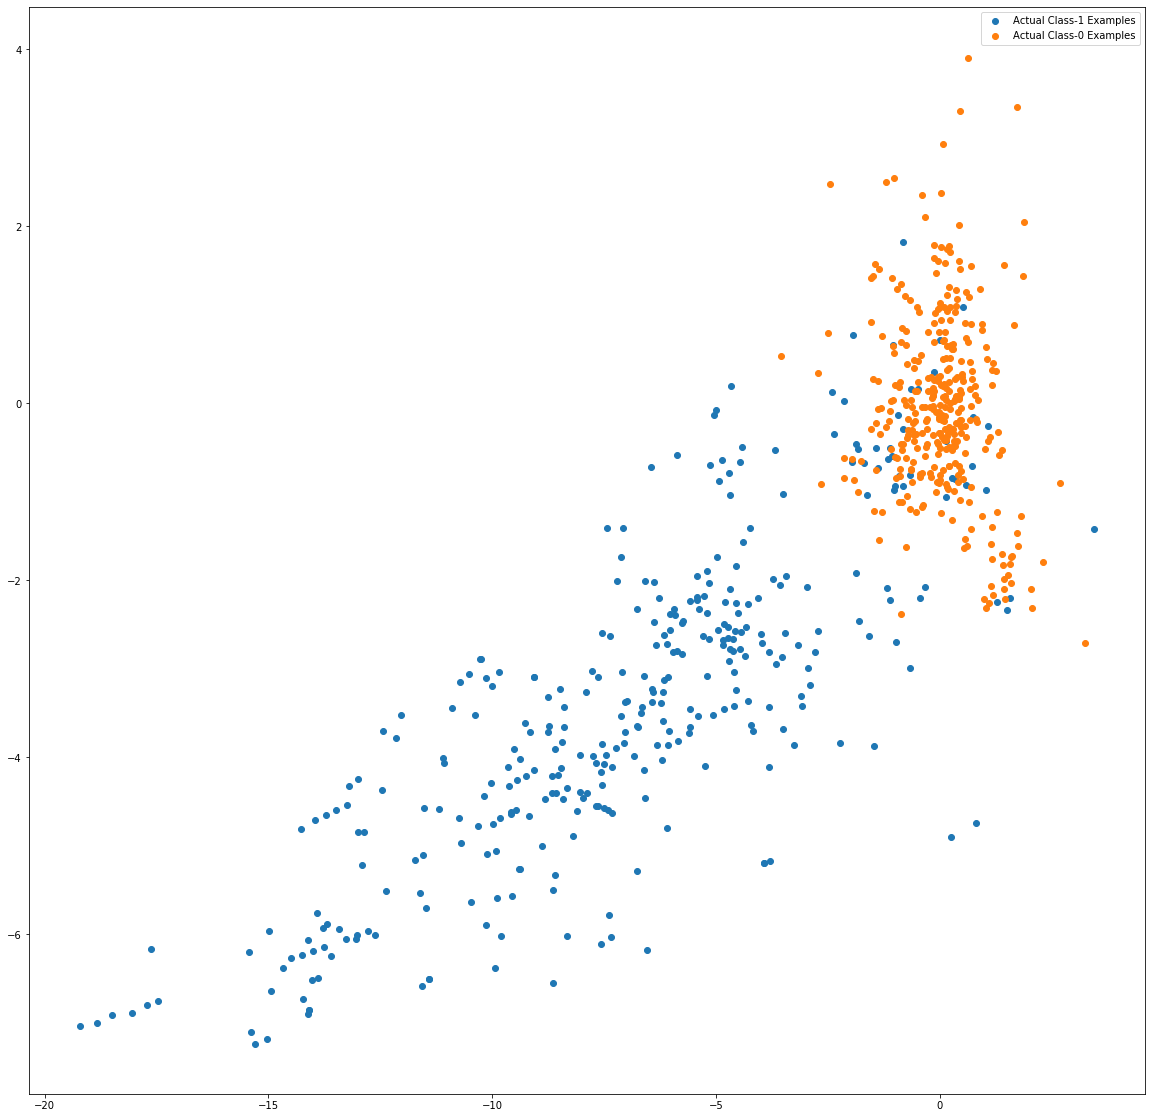

In [74]:
var_imp = []
for i in feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

**We can see that Logistic Regression, DecisionTree and XGBoost models are performing better,  lets lets proceed with the models DecisionTree, LogisticRegression and XGBoost models with oversampling techniques for balancing data and evaluate them**

### Random Oversampling on
- Decision Tree
- Logistic Regression
- XGBoosting

#### To handle imbalance Data, we are using over sample technic

In [75]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_oversampled_train, y_oversampled_train = ros.fit_sample(X_train,y_train)


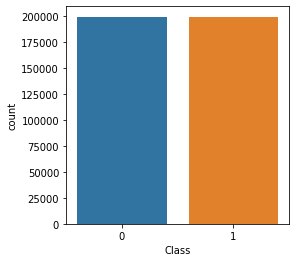

In [81]:
# check if the class is balanced
plt.figure(figsize=(4,4))
sns.countplot(y_oversampled_train)

In [82]:
# Logistic Regression
lr=LogisticRegression()
lr.fit(X_oversampled_train,y_oversampled_train)

# AUC for Logistic Regression
y_test_prob=lr.predict_proba(X_test)[:,1]
y_pred_cls = lr.predict(X_test)
print("AUC of LogisticRegression before hyperparameter tuning :    \t", round(roc_auc_score(y_test, y_test_prob),3))

AUC of LogisticRegression before hyperparameter tuning :    	 0.974


In [83]:
print('Metric for Logistic Regression before hyperparameter tuning with random oversampling techniques')
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_cls)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_cls)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_cls)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_cls)))
print('AUC Score for test: ' + str(roc_auc_score(y_test, y_test_prob)))

Metric for Logistic Regression before hyperparameter tuning with random oversampling techniques
Accuracy Score : 0.9739358402677809
Precision Score : 0.057094162760971456
Recall Score : 0.9054054054054054
F1 Score : 0.10741482965931864
AUC Score for test: 0.9740222724629781


In [84]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred_cls)
cnf_matrix

array([[83082,  2213],
       [   14,   134]], dtype=int64)

In [85]:
roc_balanced=[]
roc_balanced.append(('LR plain',round(roc_auc_score(y_test, y_test_prob),3)))
roc_balanced

[('LR plain', 0.974)]

In [95]:
## Hyperparameter tuning 

#perform cross validation
folds = StratifiedKFold(n_splits =3, shuffle = True)
params = {'C':[0.001,0.01,0.1,1,10,100,1000],'penalty':['l1','l2']}

#perform hyperparameter tuning
model = GridSearchCV(estimator =lr ,cv=folds,param_grid = params,n_jobs=-1,scoring='roc_auc',verbose=1)
model.fit(X_oversampled_train,y_oversampled_train)

#print the evaluation result by choosing a evaluation metric
y_test_pred=model.predict_proba(X_test)[:,1]
y_pred_cls = model.predict(X_test)
print("AUC for LogisticRegression post hyperparamater tuning: ",round(roc_auc_score(y_test,y_test_pred),2))

# print best hyperparameters
print("Best hyperparameters for LogisticRegression: ", model.best_params_)

roc_balanced.append(('LR hyper',round(roc_auc_score(y_test, y_test_pred),3)))
roc_balanced

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   14.2s finished


AUC for LogisticRegression post hyperparamater tuning:  0.97
Best hyperparameters for LogisticRegression:  {'C': 1000, 'penalty': 'l2'}


[('LR plain', 0.974), ('LR hyper', 0.974)]

In [96]:
print('Metric for Logistic Regression post hyperparameter tuning with random oversampling techniques')
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_cls)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_cls)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_cls)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_cls)))
print('AUC Score for test: ' + str(roc_auc_score(y_test, y_test_pred)))

Metric for Logistic Regression post hyperparameter tuning with random oversampling techniques
Accuracy Score : 0.9739358402677809
Precision Score : 0.057094162760971456
Recall Score : 0.9054054054054054
F1 Score : 0.10741482965931864
AUC Score for test: 0.9740242132630315


#### Decision Tree with oversampled data with Hyperparameter tuning

In [97]:
# Decision Tree
dt=DecisionTreeClassifier()
dt.fit(X_oversampled_train,y_oversampled_train)

# AUC for Logistic Regression
y_test_prob=dt.predict_proba(X_test)
y_pred_cls = dt.predict(X_test)
print("AUC of DecisionTree before hyperparameter tuning :    \t", round(roc_auc_score(y_test, y_test_prob[:,1]),2))

roc_balanced.append(('DT plain',round(roc_auc_score(y_test, y_test_prob[:,1]),3)))
roc_balanced

AUC of DecisionTree before hyperparameter tuning :    	 0.88


[('LR plain', 0.974), ('LR hyper', 0.974), ('DT plain', 0.878)]

In [98]:
print('Metric for Decision Tree before hyperparameter tuning with random oversampling techniques')
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_cls)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_cls)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_cls)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_cls)))
print('AUC Score for test: ' + str(roc_auc_score(y_test, y_test_prob[:,1])))

Metric for Decision Tree before hyperparameter tuning with random oversampling techniques
Accuracy Score : 0.9993328885923949
Precision Score : 0.8421052631578947
Recall Score : 0.7567567567567568
F1 Score : 0.797153024911032
AUC Score for test: 0.8782552762035732


In [99]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred_cls)
cnf_matrix

array([[85274,    21],
       [   36,   112]], dtype=int64)

In [101]:
### Hyper parameter tuning
# define Cross validataion
cv=StratifiedKFold(n_splits=3,shuffle=True)

# hyperparameter tuning
params ={'criterion':['gini','entropy'],'max_depth':range(1,10,2),'min_samples_leaf': range(20, 100, 20)}

# perform gridsearch 
dtree_gridsearch = GridSearchCV(estimator=dtree,param_grid=params,verbose=1,cv=cv,n_jobs = -1,scoring='roc_auc')
dtree_gridsearch.fit(X_oversampled_train,y_oversampled_train)
print(dtree_gridsearch.best_estimator_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  3.0min finished


DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=20)


In [103]:
## Predicting test with best features of Decision Tree
y_pred_dt = dtree_gridsearch.predict_proba(X_test)
y_pred_cls = dtree_gridsearch.predict(X_test)

print("AUC score of Decision Tree after hyperparameter tuning is: ",roc_auc_score(y_test,y_pred_dt[:,1]))
roc_balanced.append(('DT hyper',round(roc_auc_score(y_test, y_pred_dt[:,1]),3)))
roc_balanced

AUC score of Decision Tree after hyperparameter tuning is:  0.9107033538609246


[('LR plain', 0.974),
 ('LR hyper', 0.974),
 ('DT plain', 0.878),
 ('DT hyper', 0.911)]

In [104]:
print('Metric for Decision Tree post hyperparameter tuning with random oversampling techniques')
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_cls)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_cls)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_cls)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_cls)))
print('AUC Score for test: ' + str(roc_auc_score(y_test, y_pred_dt[:,1])))

Metric for Decision Tree post hyperparameter tuning with random oversampling techniques
Accuracy Score : 0.9841765855599639
Precision Score : 0.08425414364640885
Recall Score : 0.8243243243243243
F1 Score : 0.15288220551378448
AUC Score for test: 0.9107033538609246


#### XGboost with oversampled data with Hyperparamter tuning

In [105]:
# XGBoost Classifier
xgb=XGBClassifier()
xgb.fit(X_oversampled_train,y_oversampled_train)

# AUC for XGBoost Classifier
y_test_prob=xgb.predict_proba(X_test)
y_pred_cls = xgb.predict(X_test)
print("AUC of xgboosting before hyperparameter tuning :    \t", round(roc_auc_score(y_test, y_test_prob[:,1]),2))

roc_balanced.append(('xgb plain',round(roc_auc_score(y_test, y_test_prob[:,1]),3)))
roc_balanced

AUC of xgboosting before hyperparameter tuning :    	 0.97


[('LR plain', 0.974),
 ('LR hyper', 0.974),
 ('DT plain', 0.878),
 ('DT hyper', 0.911),
 ('xgb plain', 0.971)]

In [106]:
print('Metric for XGBoosting before hyperparameter tuning with random oversampling techniques')
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_cls)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_cls)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_cls)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_cls)))
print('AUC Score for test: ' + str(roc_auc_score(y_test, y_test_prob[:,1])))

Metric for XGBoosting before hyperparameter tuning with random oversampling techniques
Accuracy Score : 0.9995552590615966
Precision Score : 0.9104477611940298
Recall Score : 0.8243243243243243
F1 Score : 0.8652482269503546
AUC Score for test: 0.971070275973846


In [115]:
### hyper parameter tuning of XGBoost

cv=StratifiedKFold(n_splits=3,shuffle=True)

## hyperparameter tuning of max_depth
params={'learning_rate': [0.1,0.2, 0.6,0.8], 
             'subsample': [0.1,0.3, 0.6, 0.9]}
xgb_c=XGBClassifier()

# Gridsearch CV
xgb_md =GridSearchCV(estimator = xgb_c,param_grid = params,cv=cv,n_jobs=-1,verbose=1,scoring='roc_auc',)
xgb_md.fit(X_oversampled_train,y_oversampled_train) 

print("Best parameters for XGBoost with oversampling is:", xgb_md.best_params_)
y_test_prob = xgb_md.predict_proba(X_test)
y_pred_cls = xgb_md.predict(X_test)
 
roc_balanced.append(('xgb hyper',round(roc_auc_score(y_test, y_test_prob[:,1]),3)))
roc_balanced

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 21.9min finished


Best parameters for XGBoost with oversampling is: {'learning_rate': 0.2, 'subsample': 0.9}


[('LR plain', 0.974),
 ('LR hyper', 0.974),
 ('DT plain', 0.878),
 ('DT hyper', 0.911),
 ('xgb plain', 0.971),
 ('xgb hyper', 0.966)]

In [116]:
print('Metric for XGBoosting before hyperparameter tuning with random oversampling techniques')
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_cls)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_cls)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_cls)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_cls)))
print('AUC Score for test: ' + str(roc_auc_score(y_test, y_test_prob[:,1])))

Metric for XGBoosting before hyperparameter tuning with random oversampling techniques
Accuracy Score : 0.9995201479348805
Precision Score : 0.8905109489051095
Recall Score : 0.8243243243243243
F1 Score : 0.856140350877193
AUC Score for test: 0.965945692453694


### Oversampling using SMOTE 
- Decision Tree
- Logistic Regression
- XGBoosting

In [117]:
import warnings
warnings.filterwarnings("ignore")
from imblearn import over_sampling

sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
#X_test_smote, y_test_smote = sm.fit_resample(X_test, y_test)

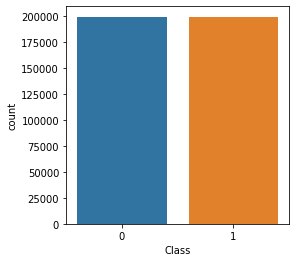

In [163]:
# Check if the class is balanced
plt.figure(figsize=(4,4))
sns.countplot(y_train_smote)

#### Logistic Regression with smote

In [168]:
# Logistic Regression
lr=LogisticRegression()
lr.fit(X_train_smote,y_train_smote)

roc_smote =[]
# AUC for Logistic Regression
y_test_prob=lr.predict_proba(X_test)[:,1]
y_pred_cls = lr.predict(X_test)

print("AUC of LogisticRegression before hyperparameter tuning - Smote : ", round(roc_auc_score(y_test, y_test_prob),2))
roc_smote.insert(0,('LR plain',round(roc_auc_score(y_test, y_test_prob),3)))
#roc_smote.append(('LR plain',round(roc_auc_score(y_test, y_test_prob),2)))
roc_smote

AUC of LogisticRegression before hyperparameter tuning - Smote :  0.97


[('LR plain', 0.974)]

In [169]:
print('Metric for Logistic Regression before hyperparameter tuning with Oversampling techniques - SMOTE')
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_cls)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_cls)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_cls)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_cls)))
print('AUC Score for test: ' + str(roc_auc_score(y_test, y_test_prob)))

Metric for Logistic Regression before hyperparameter tuning with Oversampling techniques - SMOTE
Accuracy Score : 0.9737836920520113
Precision Score : 0.05640373197625106
Recall Score : 0.8986486486486487
F1 Score : 0.10614525139664804
AUC Score for test: 0.9737913568648079


In [170]:
## hyper parameter tuning for LR
## Hyperparameter tuning 

#perform cross validation
folds = StratifiedKFold(n_splits =3, shuffle = True)
params = {'C':[0.01,0.1,1,10,100],'penalty':['l1','l2']}

#perform hyperparameter tuning
model = GridSearchCV(estimator =lr ,cv=folds,param_grid = params,n_jobs=-1,scoring='roc_auc',verbose=1)
model.fit(X_train_smote,y_train_smote)

#print the evaluation result by choosing a evaluation metric
y_test_pred=model.predict_proba(X_test)[:,1]
y_pred_cls = model.predict(X_test)
print("AUC for LogisticRegression post hyperparamater tuning: ",round(roc_auc_score(y_test,y_test_pred),2))

# print best hyperparameters
print("Best hyperparameters for LogisticRegression: ", model.best_params_)

roc_smote.append(('LR hyper',round(roc_auc_score(y_test, y_test_pred),3)))
roc_smote

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   13.8s finished


AUC for LogisticRegression post hyperparamater tuning:  0.97
Best hyperparameters for LogisticRegression:  {'C': 100, 'penalty': 'l2'}


[('LR plain', 0.974), ('LR hyper', 0.974)]

In [171]:
print('Metric for Logistic Regression post hyperparameter tuning with Oversampling techniques - SMOTE')
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_cls)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_cls)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_cls)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_cls)))
print('AUC Score for test: ' + str(roc_auc_score(y_test, y_test_prob)))

Metric for Logistic Regression post hyperparameter tuning with Oversampling techniques - SMOTE
Accuracy Score : 0.973807099469822
Precision Score : 0.056451612903225805
Recall Score : 0.8986486486486487
F1 Score : 0.10623003194888178
AUC Score for test: 0.9737913568648079


#### Decision Tree using SMOTE Technique with Hyperparameter tuning

In [122]:
# Decision Tree
dt=DecisionTreeClassifier()
dt.fit(X_train_smote,y_train_smote)

# AUC for Logistic Regression
y_test_prob=dt.predict_proba(X_test)
y_pred_cls = dt.predict(X_test)
print("AUC of DecisionTree before hyperparameter tuning :    \t", round(roc_auc_score(y_test, y_test_prob[:,1]),2))

roc_smote.append(('DT plain',round(roc_auc_score(y_test, y_test_prob[:,1]),3)))
roc_smote

AUC of DecisionTree before hyperparameter tuning :    	 0.89


[('LR plain', 0.97), ('LR hyper', 0.97), ('DT plain', 0.888)]

In [123]:
print('Metric for DecisionTree before hyperparameter tuning with Oversampling techniques - SMOTE')
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_cls)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_cls)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_cls)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_cls)))
print('AUC Score for test: ' + str(roc_auc_score(y_test, y_test_prob[:,1])))

Metric for DecisionTree before hyperparameter tuning with Oversampling techniques - SMOTE
Accuracy Score : 0.9978465175614152
Precision Score : 0.4323308270676692
Recall Score : 0.777027027027027
F1 Score : 0.5555555555555556
AUC Score for test: 0.8876283502565816


In [124]:
### Hyper parameter tuning
# define Cross validataion
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
cv=StratifiedKFold(n_splits=3,shuffle=True)
 
# hyperparameter tuning
params ={'criterion':['gini','entropy'],'max_depth':range(1,10,2),'min_samples_leaf': range(20, 100, 20)}

# perform gridsearch 
dtree_gridsearch = GridSearchCV(estimator=dtree,param_grid=params,verbose=1,cv=cv,n_jobs = -1,scoring='roc_auc')
dtree_gridsearch.fit(X_train_smote, y_train_smote)
print(dtree_gridsearch.best_estimator_)

# predicting the values 
y_pred_dt = dtree_gridsearch.predict_proba(X_test)
y_pred_cls = dtree_gridsearch.predict(X_test)

print("AUC of DecisionTree after hyperparameter tuning :    \t", round(roc_auc_score(y_test, y_pred_dt[:,1]),2))

roc_smote.append(('DT hyper',round(roc_auc_score(y_test, y_pred_dt[:,1]),2)))
roc_smote

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.8min finished


DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=40)
AUC of DecisionTree after hyperparameter tuning :    	 0.94


[('LR plain', 0.97),
 ('LR hyper', 0.97),
 ('DT plain', 0.888),
 ('DT hyper', 0.94)]

In [127]:
print('Metric for DecisionTree post hyperparameter tuning with Oversampling techniques - SMOTE')
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_cls)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_cls)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_cls)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_cls)))
print('AUC Score for test: ' + str(roc_auc_score(y_test, y_pred_dt[:,1])))

Metric for DecisionTree post hyperparameter tuning with Oversampling techniques - SMOTE
Accuracy Score : 0.9732336177334597
Precision Score : 0.054560599750104126
Recall Score : 0.8851351351351351
F1 Score : 0.10278540604158494
AUC Score for test: 0.9372426459521248


#### XGboost using SMOTE Technique with Hyperparamter tuning

In [131]:
# XGBoost 
xgb=XGBClassifier()
xgb.fit(X_train_smote,y_train_smote)

# AUC for Logistic Regression
y_test_prob=xgb.predict_proba(X_test)
y_pred_cls = xgb.predict(X_test)
print("AUC of XGB before hyperparameter tuning :    \t", round(roc_auc_score(y_test, y_test_prob[:,1]),2))

roc_smote.append(('XGB plain',round(roc_auc_score(y_test, y_test_prob[:,1]),3)))
roc_smote

AUC of XGB before hyperparameter tuning :    	 0.97


[('LR plain', 0.97),
 ('LR hyper', 0.97),
 ('DT plain', 0.888),
 ('DT hyper', 0.94),
 ('XGB plain', 0.972)]

In [132]:
print('Metric for XGBoosting before hyperparameter tuning with Oversampling techniques - SMOTE')
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_cls)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_cls)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_cls)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_cls)))
print('AUC Score for test: ' + str(roc_auc_score(y_test, y_test_prob[:,1])))

Metric for XGBoosting before hyperparameter tuning with Oversampling techniques - SMOTE
Accuracy Score : 0.9993094811745842
Precision Score : 0.7870967741935484
Recall Score : 0.8243243243243243
F1 Score : 0.8052805280528054
AUC Score for test: 0.9723769493158085


In [133]:
### hyper parameter tuning of XGBoost
from xgboost import XGBClassifier
cv=StratifiedKFold(n_splits=3,shuffle=True)

## hyperparameter tuning of max_depth
params={'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}
xgb_c=XGBClassifier()

# Gridsearch CV
xgb_md =GridSearchCV(estimator = xgb_c,param_grid = params,cv=cv,n_jobs=-1,verbose=1,scoring='roc_auc',)
xgb_md.fit(X_train_smote, y_train_smote)
# print best parameters
print("Best hyperparameters with SMOTE data are : ",xgb_md.best_params_)

# predicting the values 
y_pred_xgb = xgb_md.predict_proba(X_test)
y_pred_cls = xgb_md.predict(X_test)

print("AUC of XGB after hyperparameter tuning :    \t", round(roc_auc_score(y_test, y_pred_xgb[:,1]),2))

roc_smote.append(('XGB hyper',round(roc_auc_score(y_test, y_pred_xgb[:,1]),3)))
roc_smote

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 13.0min finished


Best hyperparameters with SMOTE data are :  {'learning_rate': 0.6, 'subsample': 0.6}
AUC of XGB after hyperparameter tuning :    	 0.97


[('LR plain', 0.97),
 ('LR hyper', 0.97),
 ('DT plain', 0.888),
 ('DT hyper', 0.94),
 ('XGB plain', 0.972),
 ('XGB hyper', 0.969)]

In [134]:
print('Metric for XGBoosting post hyperparameter tuning with Oversampling techniques - SMOTE')
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_cls)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_cls)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_cls)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_cls)))
print('AUC Score for test: ' + str(roc_auc_score(y_test, y_pred_xgb[:,1])))

Metric for XGBoosting post hyperparameter tuning with Oversampling techniques - SMOTE
Accuracy Score : 0.9993445923013002
Precision Score : 0.8066666666666666
Recall Score : 0.8175675675675675
F1 Score : 0.8120805369127517
AUC Score for test: 0.9691467450802699


### Random oversampling using ADASYN on
- Decision Tree
- Random Forest
- XGBoosting

In [135]:
from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
#X_test_adasyn, y_test_adasyn = ada.fit_resample(X_test, y_test)


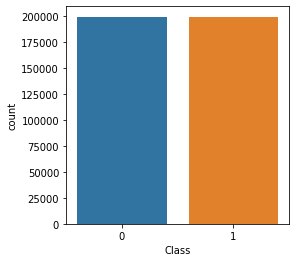

In [137]:
plt.figure(figsize=(4,4))
sns.countplot(y_train_adasyn)

#### Logistic Regression using Adasyn oversampling technique

In [139]:
# Logistic Regression
lr=LogisticRegression()
lr.fit(X_train_adasyn,y_train_adasyn)

roc_adasyn =[]
# AUC for Logistic Regression
y_test_prob=lr.predict_proba(X_test)[:,1]
y_pred_cls = lr.predict(X_test)
print("AUC of LogisticRegression before hyperparameter tuning - ADASYN : ", round(roc_auc_score(y_test, y_test_prob),2))
roc_adasyn.append(('LR plain',round(roc_auc_score(y_test, y_test_prob),3)))
roc_adasyn

AUC of LogisticRegression before hyperparameter tuning - ADASYN :  0.98


[('LR plain', 0.975)]

In [140]:
print('Metric for Logistic Regression before hyperparameter tuning with Oversampling techniques - SMOTE')
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_cls)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_cls)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_cls)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_cls)))
print('AUC Score for test: ' + str(roc_auc_score(y_test, y_test_prob)))

Metric for Logistic Regression before hyperparameter tuning with Oversampling techniques - SMOTE
Accuracy Score : 0.9121636646653325
Precision Score : 0.017953086096186607
Recall Score : 0.9256756756756757
F1 Score : 0.03522303637999743
AUC Score for test: 0.975101476117069


In [162]:
## hyper parameter tuning for LR
## Hyperparameter tuning 

#perform cross validation
folds = StratifiedKFold(n_splits =3, shuffle = True)
params = {'C':[0.01,0.1,1,10,100],'penalty':['l1','l2']}

#perform hyperparameter tuning
model = GridSearchCV(estimator =lr ,cv=folds,param_grid = params,n_jobs=-1,scoring='precision',verbose=1)
model.fit(X_train_adasyn,y_train_adasyn)

#print the evaluation result by choosing a evaluation metric
y_test_pred=model.predict_proba(X_test)
y_pred_cls = model.predict(X_test)
print("AUC for LogisticRegression post hyperparamater tuning - ADASYN: ",round(roc_auc_score(y_test,y_test_pred[:,1]),2))

# print best hyperparameters
print("Best hyperparameters for LogisticRegression: ", model.best_params_)

roc_adasyn.append(('LR hyper',round(roc_auc_score(y_test, y_test_pred[:,1]),3)))
roc_adasyn

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   14.7s finished


AUC for LogisticRegression post hyperparamater tuning - ADASYN:  0.97
Best hyperparameters for LogisticRegression:  {'C': 0.01, 'penalty': 'l2'}


[('LR plain', 0.975),
 ('LR hyper', 0.975),
 ('DT plain', 0.88),
 ('DT hyper', 0.935),
 ('XGB plain', 0.959),
 ('XGB hyper', 0.96)]

In [142]:
print('Metric for Logistic Regression post hyperparameter tuning with Oversampling techniques - ADASYN')
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_cls)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_cls)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_cls)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_cls)))
print('AUC Score for test: ' + str(roc_auc_score(y_test, y_test_pred[:,1])))

Metric for Logistic Regression post hyperparameter tuning with Oversampling techniques - ADASYN
Accuracy Score : 0.9125849981859251
Precision Score : 0.01803818301514154
Recall Score : 0.9256756756756757
F1 Score : 0.03538680098153171
AUC Score for test: 0.9748058011701836


#### Decision Tree using ADASYN Technique with Hyperparameter tuning

In [143]:
## Decision Tree
dt=DecisionTreeClassifier()
dt.fit(X_train_adasyn,y_train_adasyn)

# AUC for Logistic Regression
y_test_prob=dt.predict_proba(X_test)
y_pred_cls = dt.predict(X_test)
print("AUC of DecisionTree before hyperparameter tuning :    \t", round(roc_auc_score(y_test, y_test_prob[:,1]),2))

roc_adasyn.append(('DT plain',round(roc_auc_score(y_test, y_test_prob[:,1]),2)))
roc_adasyn

AUC of DecisionTree before hyperparameter tuning :    	 0.88


[('LR plain', 0.975), ('LR hyper', 0.97), ('DT plain', 0.88)]

In [144]:
print('Metric for DecisionTree before hyperparameter tuning with Oversampling techniques - ADASYN')
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_cls)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_cls)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_cls)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_cls)))
print('AUC Score for test: ' + str(roc_auc_score(y_test, y_test_prob[:,1])))

Metric for DecisionTree before hyperparameter tuning with Oversampling techniques - ADASYN
Accuracy Score : 0.9978933323970366
Precision Score : 0.437984496124031
Recall Score : 0.7635135135135135
F1 Score : 0.5566502463054187
AUC Score for test: 0.8809067655497693


In [145]:
### Hyper parameter tuning
# define Cross validataion
cv=StratifiedKFold(n_splits=3,shuffle=True)

# hyperparameter tuning
params ={'criterion':['gini','entropy'],'max_depth':range(1,10,2),'min_samples_leaf': range(20, 100, 20)}

# perform gridsearch 
dtree_gridsearch = GridSearchCV(estimator=dt,param_grid=params,verbose=1,cv=cv,n_jobs = -1,scoring='roc_auc')
dtree_gridsearch.fit(X_train_adasyn,    y_train_adasyn)
print(dtree_gridsearch.best_estimator_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  4.8min finished


DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=20)


In [146]:
# predict the data on Test
y_pred_dt = dtree_gridsearch.predict_proba(X_test)
y_pred_cls = dtree_gridsearch.predict(X_test)

roc_adasyn.append(('DT hyper',round(roc_auc_score(y_test, y_pred_dt[:,1]),3)))
roc_adasyn

[('LR plain', 0.975),
 ('LR hyper', 0.97),
 ('DT plain', 0.88),
 ('DT hyper', 0.935)]

In [147]:
print('Metric for DecisionTree post hyperparameter tuning with Oversampling techniques - ADASYN')
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_cls)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_cls)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_cls)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_cls)))
print('AUC Score for test: ' + str(roc_auc_score(y_test, y_pred_dt[:,1])))

Metric for DecisionTree post hyperparameter tuning with Oversampling techniques - ADASYN
Accuracy Score : 0.9503762742413071
Precision Score : 0.02922227335480902
Recall Score : 0.8581081081081081
F1 Score : 0.05651980418335559
AUC Score for test: 0.9354577436337798


#### XGboost using ADASYN Technique with Hyperparamter tuning

In [148]:
# XGBoost 
xgb=XGBClassifier()
xgb.fit(X_train_adasyn,y_train_adasyn)

# AUC for Logistic Regression
y_test_prob=xgb.predict_proba(X_test)
y_test_cls=xgb.predict(X_test)
print("AUC of XGB before hyperparameter tuning :    \t", round(roc_auc_score(y_test, y_test_prob[:,1]),2))

roc_adasyn.append(('XGB plain',round(roc_auc_score(y_test, y_test_prob[:,1]),3)))
roc_adasyn

AUC of XGB before hyperparameter tuning :    	 0.96


[('LR plain', 0.975),
 ('LR hyper', 0.97),
 ('DT plain', 0.88),
 ('DT hyper', 0.935),
 ('XGB plain', 0.959)]

In [149]:
print('Metric for XGBoosting before hyperparameter tuning with Oversampling techniques - ADASYN')
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_cls)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_cls)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_cls)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_cls)))
print('AUC Score for test: ' + str(roc_auc_score(y_test, y_test_prob[:,1])))

Metric for XGBoosting before hyperparameter tuning with Oversampling techniques - ADASYN
Accuracy Score : 0.9503762742413071
Precision Score : 0.02922227335480902
Recall Score : 0.8581081081081081
F1 Score : 0.05651980418335559
AUC Score for test: 0.9593628155384415


In [150]:
# AUC for XGBoosting 
y_test_prob=xgb.predict_proba(X_test)
print("AUC of XGB before hyperparameter tuning :    \t", roc_auc_score(y_test, y_test_prob[:,1]))


AUC of XGB before hyperparameter tuning :    	 0.9593628155384415


In [ ]:
### hyper parameter tuning of XGBoost

cv=StratifiedKFold(n_splits=3,shuffle=True)

## hyperparameter tuning of max_depth
params={'learning_rate': [0.2,0.4,0.6], 
             'subsample': [0.3, 0.6, 0.9]}
xgb_c=XGBClassifier()

# Gridsearch CV
xgb_md =GridSearchCV(estimator = xgb_c,param_grid = params,cv=cv,n_jobs=-1,verbose=1,scoring='roc_auc',)
xgb_md.fit(X_train_adasyn, y_train_adasyn) 

print("Best parameters with xb hyperparameter: ",xgb_md.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [152]:
y_pred_xgb = xgb_md.predict_proba(X_test)
y_test_cls=xgb_md.predict(X_test)

print("Best ROC for XGB post hyperparameter tuning",roc_auc_score(y_test,y_pred_xgb[:,1]))
roc_adasyn.append(('XGB hyper',round(roc_auc_score(y_test, y_pred_xgb[:,1]),3)))
roc_adasyn

Best ROC for XGB post hyperparameter tuning 0.9603637138516088


[('LR plain', 0.975),
 ('LR hyper', 0.97),
 ('DT plain', 0.88),
 ('DT hyper', 0.935),
 ('XGB plain', 0.959),
 ('XGB hyper', 0.96)]

In [153]:
print('Metric for XGBoosting post hyperparameter tuning with Oversampling techniques - ADASYN')
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_cls)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_cls)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_cls)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_cls)))
print('AUC Score for test: ' + str(roc_auc_score(y_test, y_pred_xgb[:,1])))

Metric for XGBoosting post hyperparameter tuning with Oversampling techniques - ADASYN
Accuracy Score : 0.9503762742413071
Precision Score : 0.02922227335480902
Recall Score : 0.8581081081081081
F1 Score : 0.05651980418335559
AUC Score for test: 0.9603637138516088


In [154]:
roc_smote

[('LR plain', 0.97),
 ('LR hyper', 0.97),
 ('DT plain', 0.888),
 ('DT hyper', 0.94),
 ('XGB plain', 0.972),
 ('XGB hyper', 0.969)]

In [155]:
roc_balanced

[('LR plain', 0.974),
 ('LR hyper', 0.974),
 ('DT plain', 0.878),
 ('DT hyper', 0.911),
 ('xgb plain', 0.971),
 ('xgb hyper', 0.966)]

In [156]:
roc_list

[('LR_plain', 0.972),
 ('LR_hyperparameter', 0.977),
 ('DT_plain', 0.87),
 ('DT_hyper', 0.958),
 ('RF_plain', 0.93),
 ('xgb_plain', 0.97),
 ('xgb_hyper', 0.971),
 ('RF_hyper', 0.975)]

In [172]:
roc_adasyn

[('LR plain', 0.975),
 ('LR hyper', 0.975),
 ('DT plain', 0.88),
 ('DT hyper', 0.935),
 ('XGB plain', 0.959),
 ('XGB hyper', 0.96)]

#### important features of the best model to understand the dataset**

In [175]:
# Logistic Regression
clf = LogisticRegression(C= 0.01, penalty= 'l2')
clf.fit(X_oversampled_train,y_oversampled_train)

feature_importances_ = clf.coef_[0]

Top var = 4
2nd Top var = 11
3rd Top var = 27


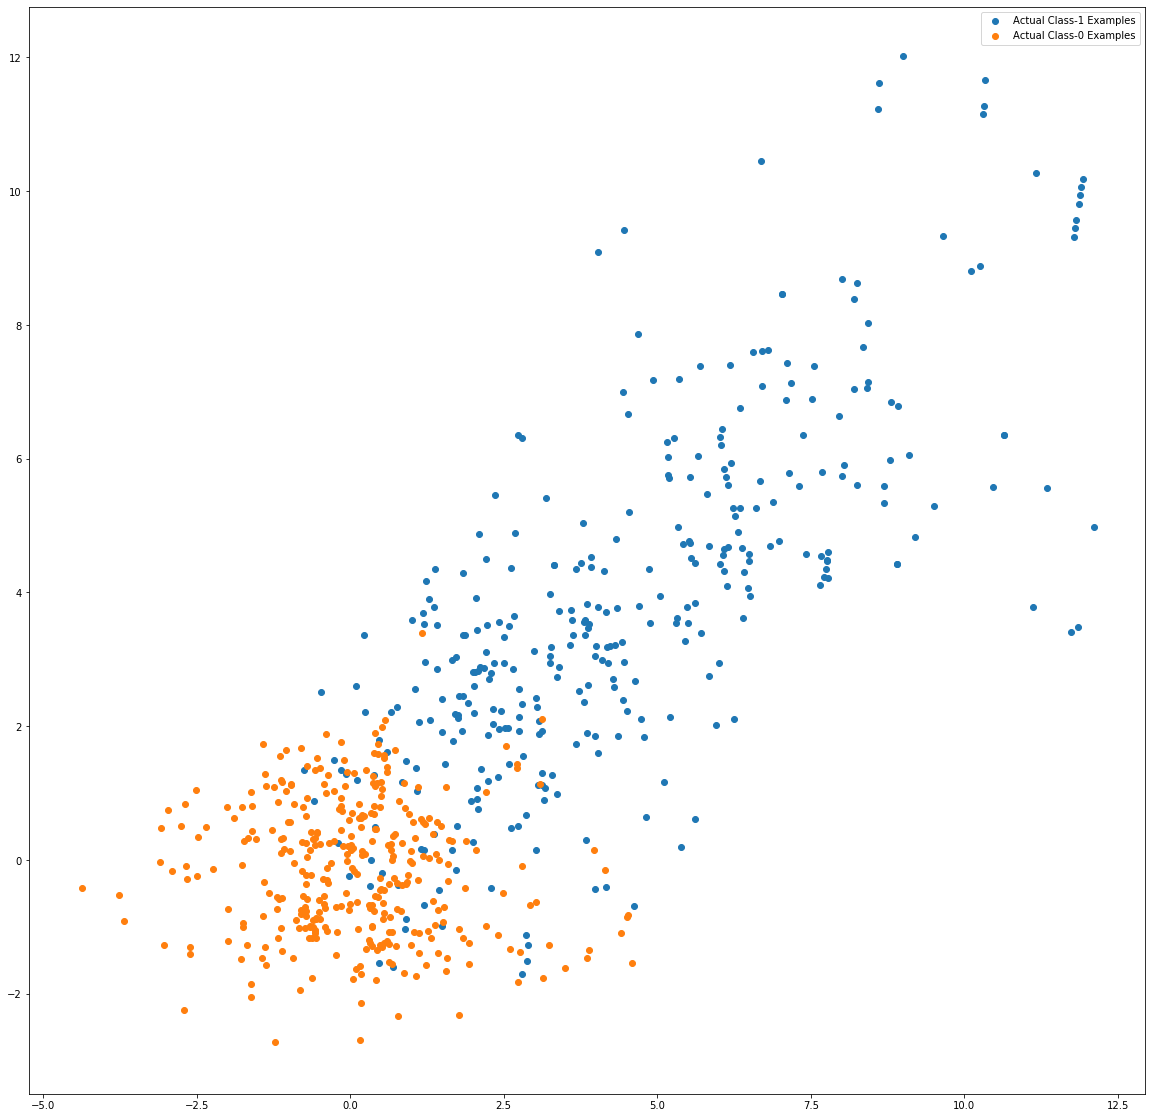

In [177]:
var_imp = []
for i in feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### ROC curve for the best model

AUC -  0.9739373525586082 



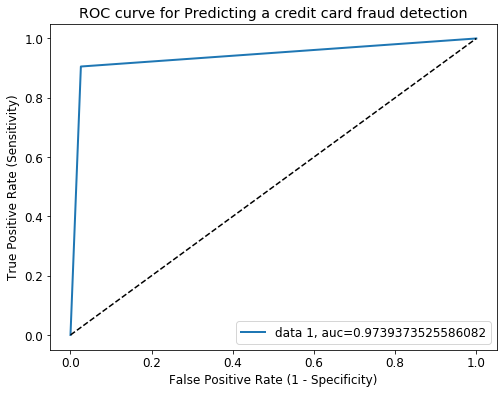

In [182]:
# plot ROC Curve
y_test_prob=lr.predict_proba(X_test)[:,1]
y_pred = lr.predict(X_test)

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

auc = metrics.roc_auc_score(y_test, y_test_prob)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

#### Conclusion 
1) We were able to accurately identify fraudulent credit card transactions using a Logistic Regression model with oversampling technique. We, therefore, chose the random forest model with oversampling technique as the better model, which obtained AUC_ROC score of 98% on the test set.

2) Recall is approx 90% which is considered as good value for this case

#### Top Three features are as below
1) Top var = V4

2) 2nd Top var = V11

3) 3rd Top var = V27